In [43]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
COLORS = ["blue", "green", "red", "orange", "yellow", "purple", "pink", "magenta"]

In [83]:
def max_x(tupla):
    maximum = max(map(lambda x: x[0], tupla))
    return maximum + 0.5 if maximum > 0 else 0.5

def max_y(tupla):
    maximum = max(map(lambda x: x[1], tupla))
    return maximum + 0.5 if maximum > 0 else 0.5

def min_x(tupla):
    minimum = min(map(lambda x: x[0], tupla))
    return minimum - 0.5 if minimum < 0 else -0.5

def min_y(tupla):
    minimum = min(map(lambda x: x[1], tupla))
    return minimum - 0.5 if minimum < 0 else -0.5

In [164]:
def plotar(*vetores: *tuple[int, int], tam = 0):
    plt.figure()
    i = 0
    for x, y in vetores:
        plt.arrow(0, 0, x, y, head_width=0.1, head_length=0.2, fc=COLORS[i], ec=COLORS[i], length_includes_head=True)
        i += 1
    plt.xlim(-1.5, 2)
    plt.ylim(-2, 1.5)

    plt.grid(True)
    plt.show()

In [129]:
def rotacionar_90(vetores):
    array = list(vetores)
    MATRIZ_ROTACAO = np.array(
        [
            [0, -1],
            [1, 0]
        ]
    )
    for i in range(len(vetores)):
        array[i] = np.dot(np.array(array[i]), MATRIZ_ROTACAO)
    return np.array(array)

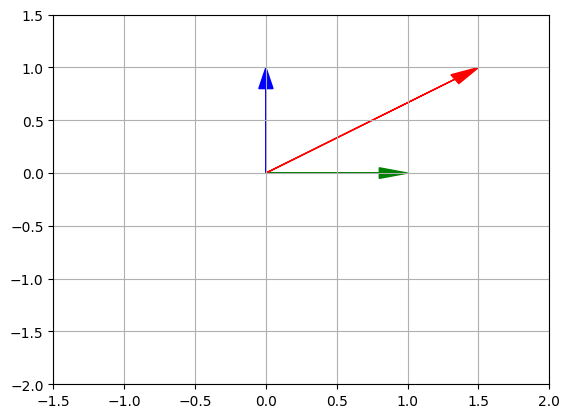

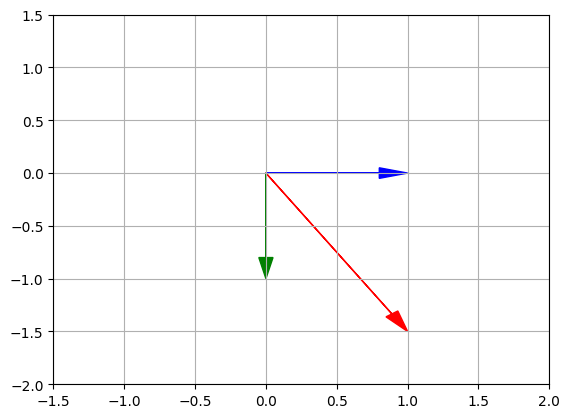

In [165]:
vetores = ([0, 1], [1, 0], [1.5, 1])
plotar(*vetores)
plotar(*rotacionar_90(vetores))